In [399]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from IPython.display import display

#pd.set_option('display.max_rows', None)

In [428]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv')
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


### Visualização das variáveis, tipos e como os valores estão distribuídos

In [212]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


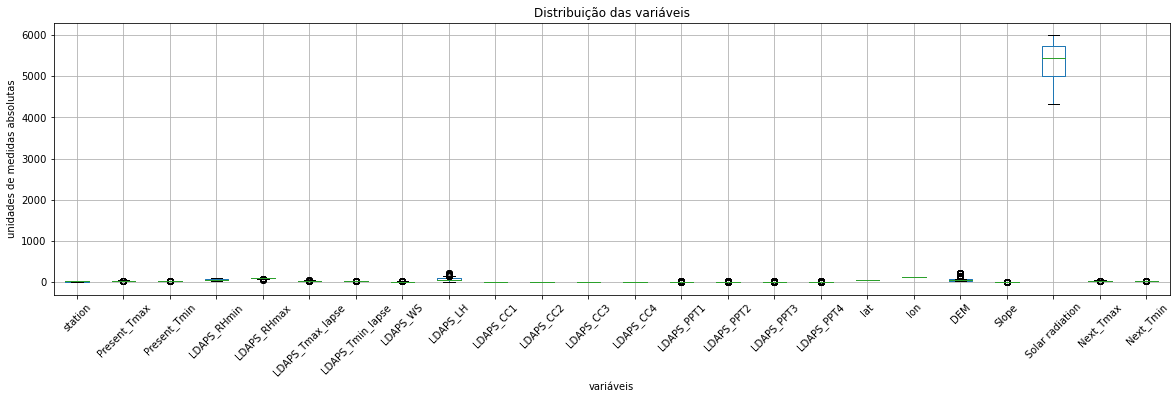

In [433]:
ax = df.boxplot(rot=45, figsize=(20,5))
plt.title("Distribuição das variáveis")
ax.set_xlabel("variáveis");
ax.set_ylabel("unidades de medidas absolutas");

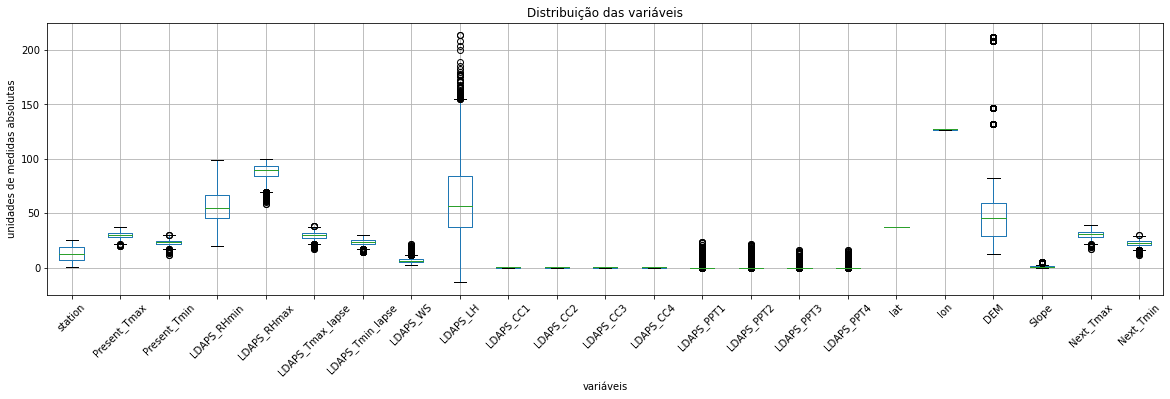

In [421]:
ax = df.drop(columns=['Solar radiation']).boxplot(rot=45, figsize=(20,5))
plt.title("Distribuição das variáveis sem solar radiation")
ax.set_xlabel("variáveis");
ax.set_ylabel("unidades de medidas absolutas");

Text(0.5, 1.0, 'Quantidade de missing values')

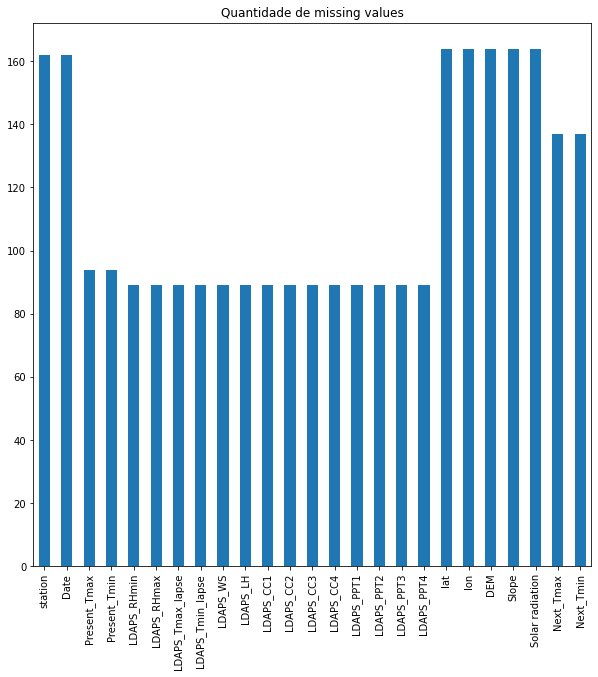

In [430]:
df[df.isna().any(axis=1)].sort_values(['station','Date']).count().plot.bar()
plt.title("Quantidade de missing values")

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


1. station é uma variável categórica, pois define o local de onde fez a coleta dos dados
2. date variavél de identificação temporal, deve ser mudada para datetime
3. lat, long, dem e slop são dados cadastrais -> vão ser os mesmos dependendo da mudança do identificador de estação 
4. 164 de  linhas no máximo possuem pelo menos um dado faltante. Os dados serão preenchidos por interpolação.
5. Todas as variáveis possuem uma boa distribuição dos dados, próximos a curva normal, com a presença de alguns outliers

Interpolando os NA da base de dados

In [436]:
df[df.isna().any(axis=1)].sort_values(['station','Date'])

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,2013-07-09,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5925.883789,23.4,22.0
300,1.0,2013-07-12,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,...,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.785000,5893.265625,23.2,20.5
450,1.0,2013-07-18,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,...,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.785000,5812.293457,27.6,21.8
975,1.0,2013-08-08,NaN,NaN,74.491829,98.365158,29.773088,26.018708,10.933694,57.163629,...,0.002514,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5360.637207,28.4,25.1
1025,1.0,2013-08-10,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,126.991,212.3350,2.785000,5304.412598,31.4,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,25.0,2013-08-10,30.1,26.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.970,19.5844,0.271300,5149.236816,35.2,24.5
5449,25.0,2016-07-31,33.4,26.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.970,19.5844,0.271300,5390.352051,33.6,26.6
5949,25.0,2016-08-20,35.2,28.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.970,19.5844,0.271300,4790.469727,36.7,28.0
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [437]:
df = df.interpolate()
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,25.0,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Alterandos os tipos de dados de data para datetime e station para categoria

In [443]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['station'] = df.astype('category')

display(df.head(10))
display(df.info())

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   object        
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

None

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.770414,23.228560,56.756257,88.373664,29.629834,23.531798,7.095409,62.450030,0.369706,0.355843,...,0.481954,0.275743,0.266810,37.544722,126.991397,61.867972,1.257048,5341.502803,30.273362,22.933295
std,2.969509,2.411129,14.638434,7.179917,2.946732,2.343752,2.175624,33.624759,0.262031,0.257659,...,1.754757,1.156448,1.200652,0.050352,0.079435,54.279780,1.370444,429.158867,3.128810,2.487885
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,46.003401,84.209478,27.680760,22.114651,5.683419,37.412333,0.147849,0.140847,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,29.900000,23.400000,54.983641,89.798084,29.725547,23.779050,6.551400,56.852122,0.318333,0.311624,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.191544,93.738503,31.741717,25.177218,8.028184,83.996017,0.577887,0.557967,...,0.019690,0.008115,0.000110,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


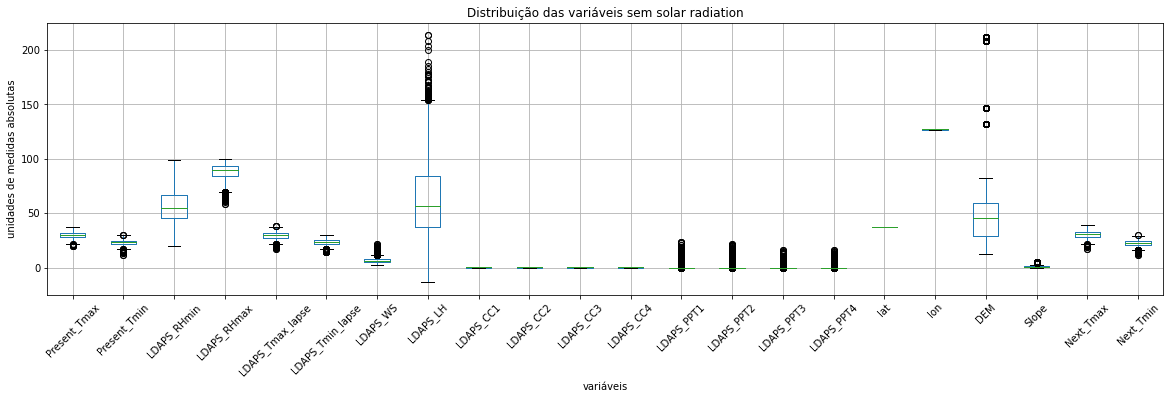

In [447]:
display(df.describe())

ax = df.drop(columns=['Solar radiation']).boxplot(rot=45, figsize=(20,5))
plt.title("Distribuição das variáveis sem solar radiation")
ax.set_xlabel("variáveis");
ax.set_ylabel("unidades de medidas absolutas");

In [448]:
df['station'].describe()

count     7752.0
unique      25.0
top         25.0
freq       312.0
Name: station, dtype: float64

### Correlação total entre os dados

Divisão dos dados por anos

In [450]:
df13 = df[(df['Date'].dt.year>=2013) & (df['Date'].dt.year<2014)]
df14 = df[(df['Date'].dt.year>=2014) & (df['Date'].dt.year<2015)]
df15 = df[(df['Date'].dt.year>=2015) & (df['Date'].dt.year<2016)]
df16 = df[(df['Date'].dt.year>=2016) & (df['Date'].dt.year<2017)]
df17 = df[(df['Date'].dt.year>=2017) & (df['Date'].dt.year<2018)]

In [451]:
def get_corr(df, columns_drop=[]):
    df_corr = df.drop(columns_drop, axis=1).corr(method='pearson')
    return df_corr

In [452]:
full_corr = get_corr(df, ['lat','lon'])
full_corr

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618525,-0.202375,-0.304333,0.571222,0.628890,-0.125678,0.135138,-0.311461,-0.212857,...,-0.138989,-0.104025,-0.101267,-0.122443,-0.099146,-0.187315,-0.107315,-0.025448,0.613440,0.624831
Present_Tmin,0.618525,1.000000,0.124438,-0.014958,0.469985,0.773019,-0.035774,-0.008753,0.087683,0.088594,...,-0.048384,0.122945,0.066286,-0.049067,-0.063084,-0.249336,-0.146860,0.053522,0.473578,0.799256
LDAPS_RHmin,-0.202375,0.124438,1.000000,0.577643,-0.566255,0.087098,0.290427,-0.072397,0.613232,0.746440,...,0.515594,0.259446,0.390917,0.240125,0.168133,0.101398,0.123243,0.246515,-0.439900,0.096369
LDAPS_RHmax,-0.304333,-0.014958,0.577643,1.000000,-0.372843,-0.115039,0.135616,0.238003,0.436500,0.390720,...,0.128703,0.270568,0.228858,0.134212,0.117490,0.175917,0.218659,0.152369,-0.285262,-0.073903
LDAPS_Tmax_lapse,0.571222,0.469985,-0.566255,-0.372843,1.000000,0.654973,-0.308010,0.048277,-0.435891,-0.525521,...,-0.432322,-0.103872,-0.243134,-0.188536,-0.160724,-0.177301,-0.161306,0.042069,0.833888,0.589212
LDAPS_Tmin_lapse,0.628890,0.773019,0.087098,-0.115039,0.654973,1.000000,-0.129827,-0.135991,0.013484,0.045396,...,-0.082534,0.045888,-0.001028,-0.089956,-0.096057,-0.193920,-0.184821,0.154401,0.595796,0.884877
LDAPS_WS,-0.125678,-0.035774,0.290427,0.135616,-0.308010,-0.129827,1.000000,0.007974,0.287089,0.257530,...,0.216372,0.150596,0.191335,0.161623,0.144140,0.191037,0.171509,0.121603,-0.344619,-0.099363
LDAPS_LH,0.135138,-0.008753,-0.072397,0.238003,0.048277,-0.135991,0.007974,1.000000,-0.150296,-0.266064,...,-0.174648,-0.015884,-0.077478,0.016337,0.020299,0.054147,0.086318,-0.047608,0.157758,-0.055547
LDAPS_CC1,-0.311461,0.087683,0.613232,0.436500,-0.435891,0.013484,0.287089,-0.150296,1.000000,0.779094,...,0.360581,0.449056,0.388202,0.167508,0.090622,-0.013300,-0.020423,0.219023,-0.450567,-0.009606
LDAPS_CC2,-0.212857,0.088594,0.746440,0.390720,-0.525521,0.045396,0.257530,-0.266064,0.779094,1.000000,...,0.529767,0.303184,0.478109,0.239655,0.159196,-0.012615,-0.017955,0.173585,-0.494188,0.030038


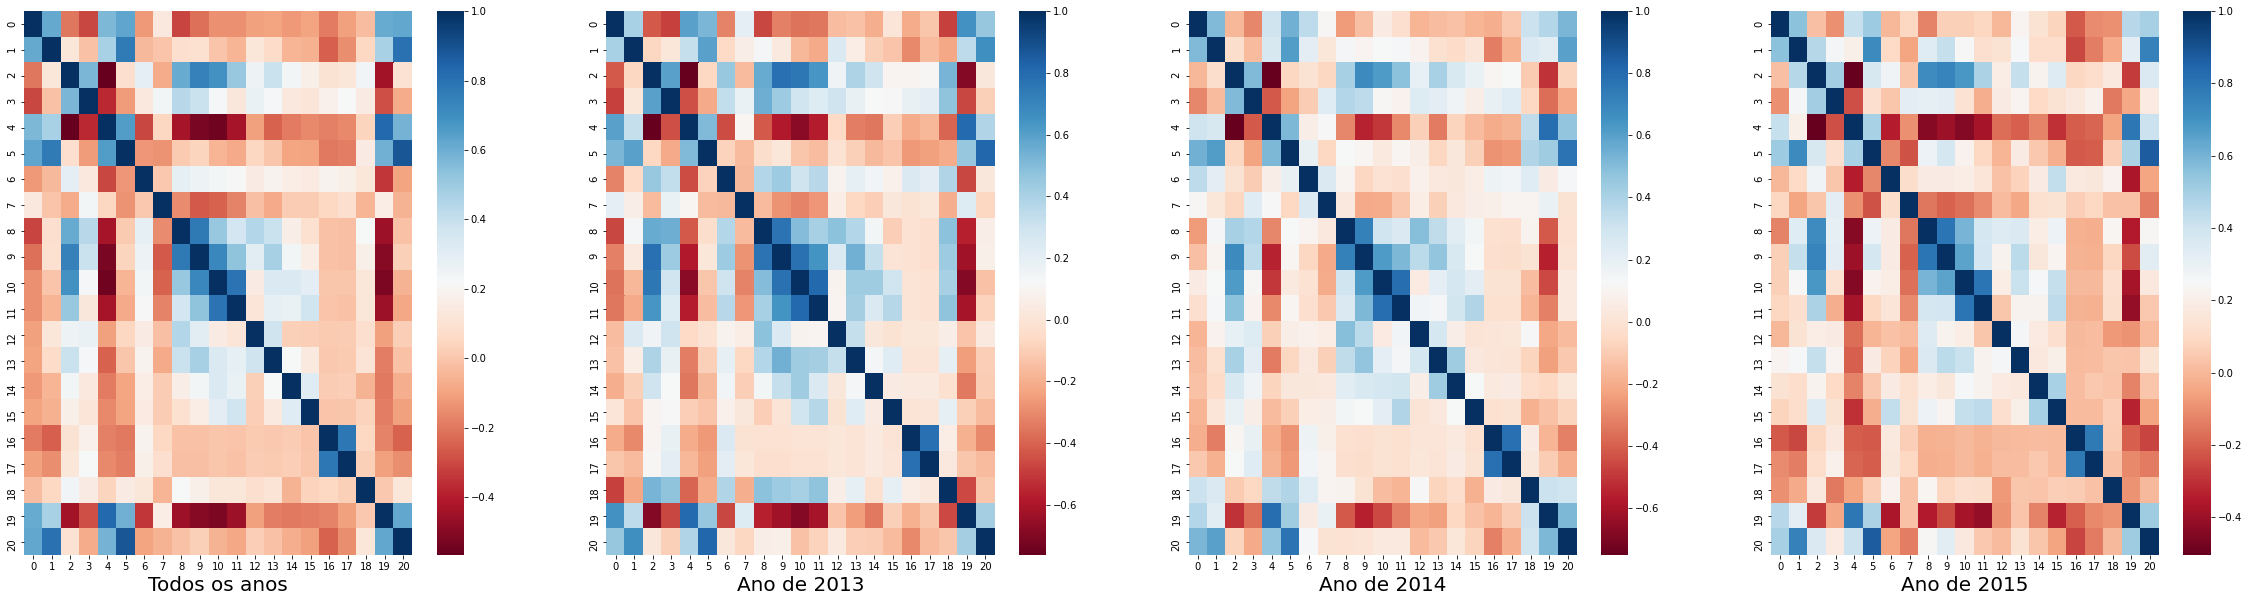

In [473]:
fig, axs = plt.subplots(ncols=4, figsize=(40, 10))

sns.heatmap(full_corr.values, linewidth=0.0, cmap='RdBu', ax=axs[0])
axs[0].set_xlabel("Todos os anos", size=20)

corr13 = get_corr(df13, ['lat','lon'])
sns.heatmap(corr13.values, linewidth=0.0, cmap='RdBu', ax=axs[1])
axs[1].set_xlabel("Ano de 2013", size=20)

corr14 = get_corr(df14, ['lat','lon'])
sns.heatmap(corr14.values, linewidth=0.0, cmap='RdBu', ax=axs[2])
axs[2].set_xlabel("Ano de 2014", size=20);

corr15 = get_corr(df15, ['lat','lon'])
sns.heatmap(corr15.values, linewidth=0.0, cmap='RdBu', ax=axs[3])
axs[3].set_xlabel("Ano de 2015", size=20)


Text(0.5, 69.0, '2015 estação 1')

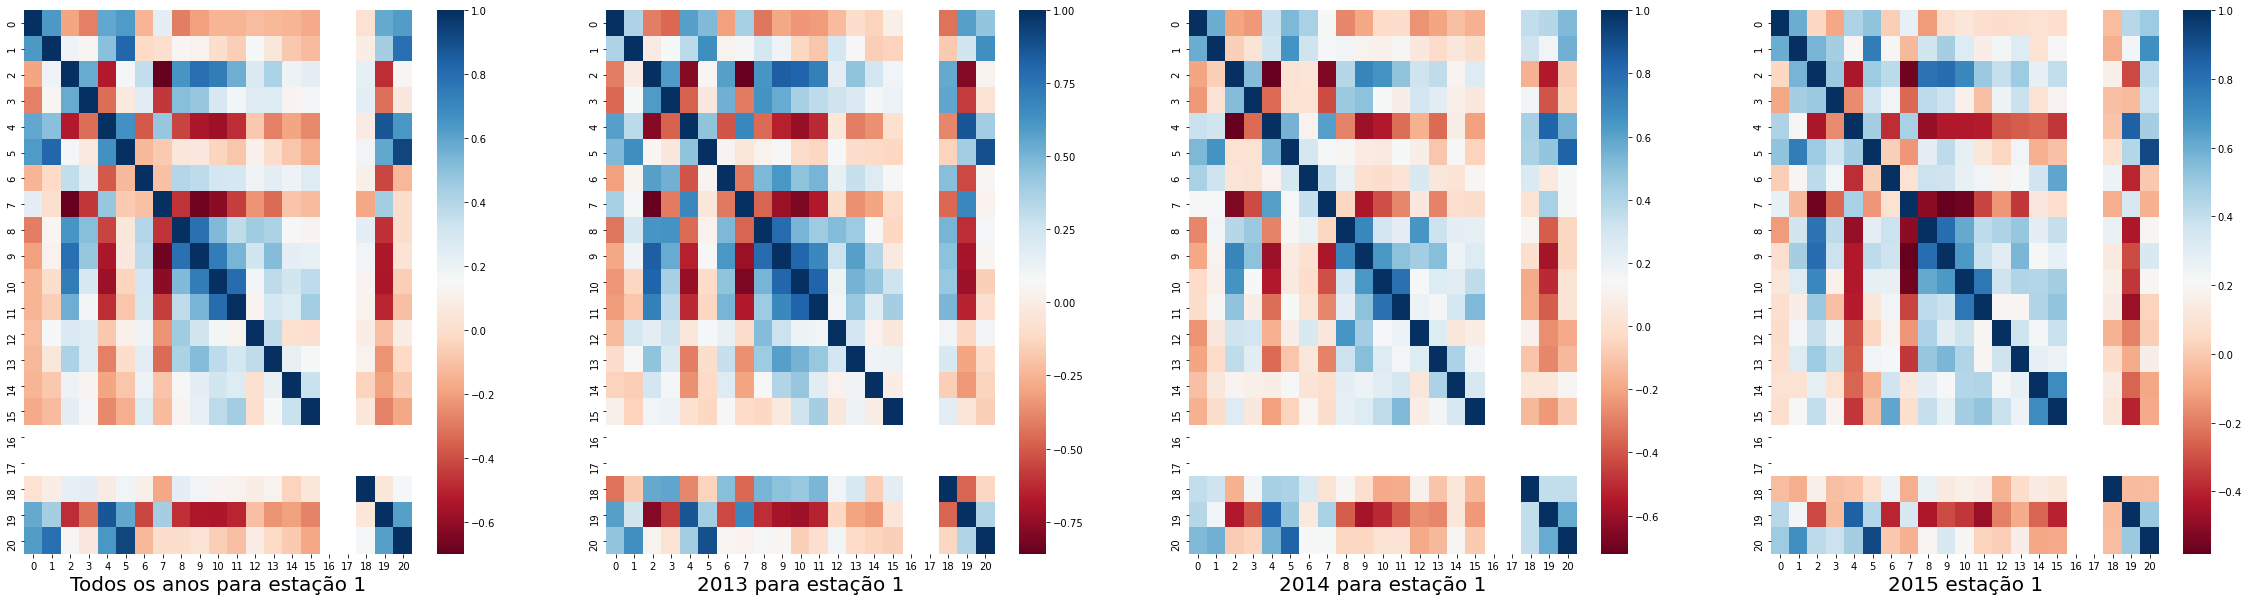

In [475]:
fig, axs = plt.subplots(ncols=4, figsize=(40, 10))

full_corr_st1 = get_corr(df.query('station==1.0'), ['lat','lon'])
sns.heatmap(full_corr_st1.values, linewidth=0.0, cmap='RdBu', ax=axs[0])
axs[0].set_xlabel("Todos os anos para estação 1", size=20)

corr13_st1 = get_corr(df13.query('station==1.0'), ['lat','lon'])
sns.heatmap(corr13_st1.values, linewidth=0.0, cmap='RdBu', ax=axs[1])
axs[1].set_xlabel("2013 para estação 1", size=20)

corr14_st1 = get_corr(df14.query('station==1.0'), ['lat','lon'])
sns.heatmap(corr14_st1.values, linewidth=0.0, cmap='RdBu', ax=axs[2])
axs[2].set_xlabel("2014 para estação 1", size=20)

corr15_st1 = get_corr(df15.query('station==1.0'), ['lat','lon'])
sns.heatmap(corr15_st1.values, linewidth=0.0, cmap='RdBu', ax=axs[3])
axs[3].set_xlabel("2015 estação 1", size=20)


Next_Tmax possui alta correlação com a maioria das variáveis, como sendo uma variável output ela se torna um valor explicado pelas suas dependencias

LDAPS_Tmax_lapse também possui forte correlação com todas as outras variáveis

Variaveis max e min possuem forte correlação entre si e CC1 até CC4 possuem forte correlação entre si

Para análises futuras algumas dessas variáveis podem ser removidas, uma vez que a sua distribuição tem correlação com outras variáveis

Possível perceber que quando segregado por estação, há um contraste maior entre os mapas.Assim, as estações precisam ser analisadas separadamente. 

A posição da estação influência nos dados coletados

Entre os anos as correlações intravariáveis permanecem as mesmas com diferenças em contrastes

Ao plotar apenas o next_max de cada periodo percebemos que os dados de temperatura não possuem uma 
correlação significativa entre os anos

In [353]:
df_st1 = df.query('station==1.0')
df13_st1 = df13.query('station==1.0')
df14_st1 = df14.query('station==1.0')
df15_st1 = df15.query('station==1.0')
df16_st1 = df16.query('station==1.0')
df17_st1 = df17.query('station==1.0')

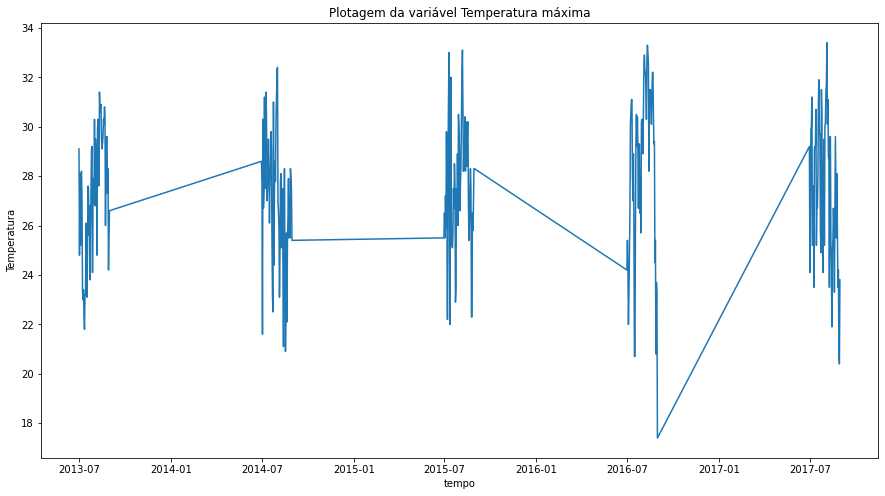

In [480]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='Date', y='Next_Tmax', data=df_st1, palette="tab10")
plt.title("Plotagem da variável Temperatura máxima")
ax.set_xlabel("tempo");
ax.set_ylabel("Temperatura");

Text(0.5, 1.0, 'Comparação da temperatura entre os anos')

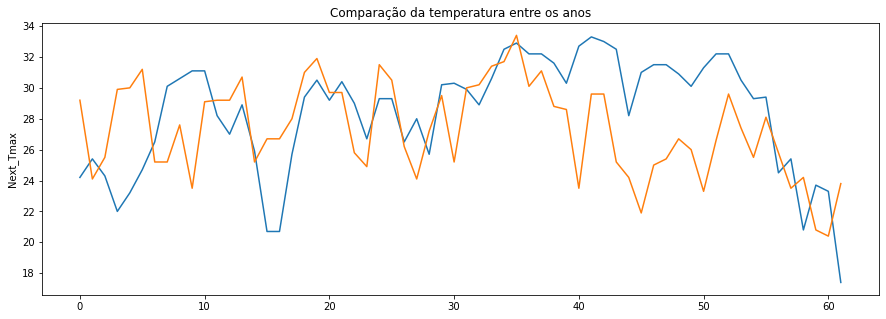

In [484]:
plt.figure(figsize=(15,5))
#sns.lineplot(x=range(0, df13_st1.shape[0]), y='Next_Tmax', data=df13_st1, palette="tab10")
#sns.lineplot(x=range(0, df14_st1.shape[0]), y='Next_Tmax', data=df14_st1, palette="tab10")
#sns.lineplot(x=range(0, df15_st1.shape[0]), y='Next_Tmax', data=df15_st1, palette="tab10")
sns.lineplot(x=range(0, df16_st1.shape[0]), y='Next_Tmax', data=df16_st1, palette="tab10")
sns.lineplot(x=range(0, df17_st1.shape[0]), y='Next_Tmax', data=df17_st1, palette="tab10")
plt.title("Comparação da temperatura entre os anos")

In [360]:
from scipy.stats import pearsonr

print(pearsonr(df13_st1['Next_Tmax'], df14_st1['Next_Tmax']))
print(pearsonr(df14_st1['Next_Tmax'], df15_st1['Next_Tmax']))
print(pearsonr(df15_st1['Next_Tmax'], df16_st1['Next_Tmax']))
print(pearsonr(df16_st1['Next_Tmax'], df17_st1['Next_Tmax']))

(-0.32900623197843837, 0.009027678229397311)
(0.0216983324602898, 0.8670588872836926)
(0.3928368057773667, 0.0015871251999095214)
(0.30253376504408164, 0.016849562831805047)


Correlações das observações de apenas uma estação entre os anos adjacentes apresentam ,em alguns casos, mostra a rejeição da hipótese nula de não haver diferença estatística entre as observações. Entretanto, mesmo com p-valor menor que 0.05 o coeficiente de correlação de pearson está baixo.

Assim, uma análise separada por anos não se faz interessante.

### Modelo de predição da temperatura

Nova base de dados sem os dados cadastrais, data e valores alvos

In [494]:
newdf_st1 = df_st1.drop(columns=['station','Date','DEM','Slope','lat','lon','Next_Tmax','Next_Tmin'])

In [495]:
newdf_st1.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation'],
      dtype='object')

Treinamento utilizando random forests e normalização dos dados.

As variáveis abaixo são utilizadas como features para a predição do target Next_Tmax
'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation'

C:\Users\gmend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RMSE: 1.453
ACC: 95.736


C:\Users\gmend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


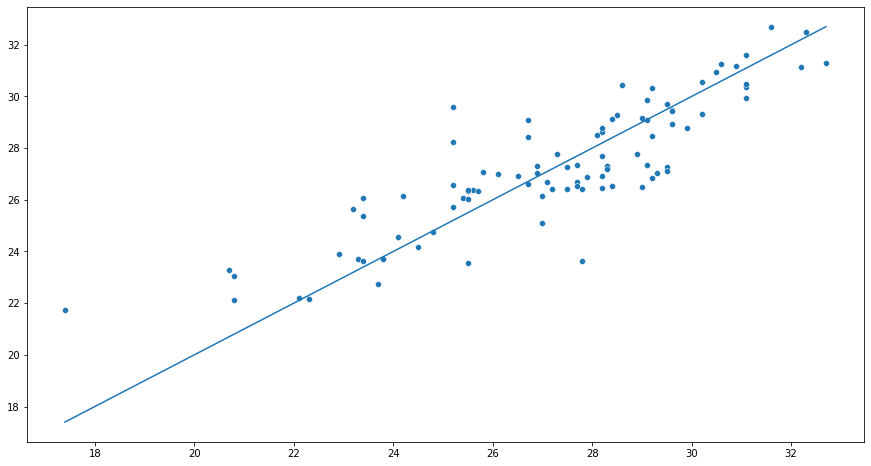

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(newdf_st1.values, df_st1['Next_Tmax'].values, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_train

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

X_test = scaler.transform(X_test)

predictions = rf.predict(X_test)

fig,ax = plt.subplots(figsize=(15,8))

sns.lineplot(y_test, y_test)
sns.scatterplot(y_test, predictions)

rmse = sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)
print('RMSE: %.3f' % rmse)
print('ACC: %.3f' % ((1-mape)*100))

Os gráficos mostram que um modelo simples consegue prever os resultados os valores de temperatura com 1.459ºC e acurácia de 95%.

Esta análise foi realizada apenas utilizando uma estação meteorologica. Cada estação deve ter um próprio modelo, pois há observações distintas.